<a href="https://colab.research.google.com/github/Hirenkhokhar/Sign_Language_Detection/blob/main/Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("content/")

Mounted at content/


In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 0 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.95 MiB | 26.66 MiB/s, done.
Resolving deltas: 100% (11260/11260), done.
/content/yolov5


In [ ]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
%cd /content/

/content


In [ ]:
!wget "https://github.com/Hirenkhokhar/Sign_Language_Detection/raw/main/Final_data/Final_data.zip"

--2024-02-05 08:23:34--  https://github.com/Hirenkhokhar/Sign_Language_Detection/raw/main/Final_data/Final_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Hirenkhokhar/Sign_Language_Detection/main/Final_data/Final_data.zip [following]
--2024-02-05 08:23:34--  https://raw.githubusercontent.com/Hirenkhokhar/Sign_Language_Detection/main/Final_data/Final_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7608085 (7.3M) [application/zip]
Saving to: ‘Final_data.zip’

Final_data.zip      100%[===================>]   7.25M  --.-KB/s    in 0.1s    

2024-02-05 08:23:35 (58.5 MB/s) - ‘Final

In [ ]:
!unzip /content/content/MyDrive/Project/Final_data.zip

Archive:  /content/content/MyDrive/Project/Final_data.zip
   creating: test/
   creating: test/images/
  inflating: test/images/Hello-20568918-c265-11ee-9a28-3cf0116999ab_jpg.rf.1dba09c6190a7397d4c481cbad0fe224.jpg  
  inflating: test/images/Hello-218bfa10-c265-11ee-a3c2-3cf0116999ab_jpg.rf.8a45b8c915041bf56f606aee2c886b11.jpg  
  inflating: test/images/Hello-265e2db9-c265-11ee-bf5c-3cf0116999ab_jpg.rf.8b71a7044571f22bf175553bc8e88dcd.jpg  
  inflating: test/images/Hello-2792e58d-c265-11ee-98d1-3cf0116999ab_jpg.rf.ffad1b0bd1bb58131b0143c48d5dc8ca.jpg  
  inflating: test/images/Hello-2c6402d2-c265-11ee-b633-3cf0116999ab_jpg.rf.dea9dd8af210d1a4cba2006a14507c9b.jpg  
  inflating: test/images/Hello-2d98bb68-c265-11ee-aea0-3cf0116999ab_jpg.rf.03529130725a72217a2f0eb6f0bbd905.jpg  
  inflating: test/images/Hello-326bd946-c265-11ee-9c13-3cf0116999ab_jpg.rf.98cc12f1fa6f0cf33a819a63afece566.jpg  
  inflating: test/images/IloveYou-9153dc96-c265-11ee-b1c5-3cf0116999ab_jpg.rf.c8e5bb0c82b54eea6d3d4

In [ ]:
# this is the YAML file  we're loading into this notebook with our data
%cat /content/data.yaml

train: /content/train
val: /content/train

nc: 6
names: ['Hello', 'I Love You', 'NO', 'Please', 'Thanks', 'Yes']



**Define Model Configuration and Architecture**

In [ ]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'6'

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [ ]:
from IPython.core.magic import register_line_cell_magic
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml
# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

**Train Custom YOLOv5 Detector**

Next, we'll fire off training!
Here, we are able to pass a number of arguments:

img: define input image size

batch: determine batch size

epochs: define the number of training
epochs. (Note: often, 3000+ are common here!)

data: set the path to our yaml file

cfg: specify our model configuration

weights: specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive folder)

name: result names
nosave: only save the final checkpoint
cache: cache images for faster training

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 300 --data '/content/data.yaml' --cfg '/content/yolov5/models/custom_yolov5s.yaml' --weights 'yolov5s.pt' --name yolov5s_results --cache

/content/yolov5
2024-02-05 08:30:40.389162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 08:30:40.389219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 08:30:40.390540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/custom_yolov5s.yaml, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image

In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/content/MyDrive/Project/

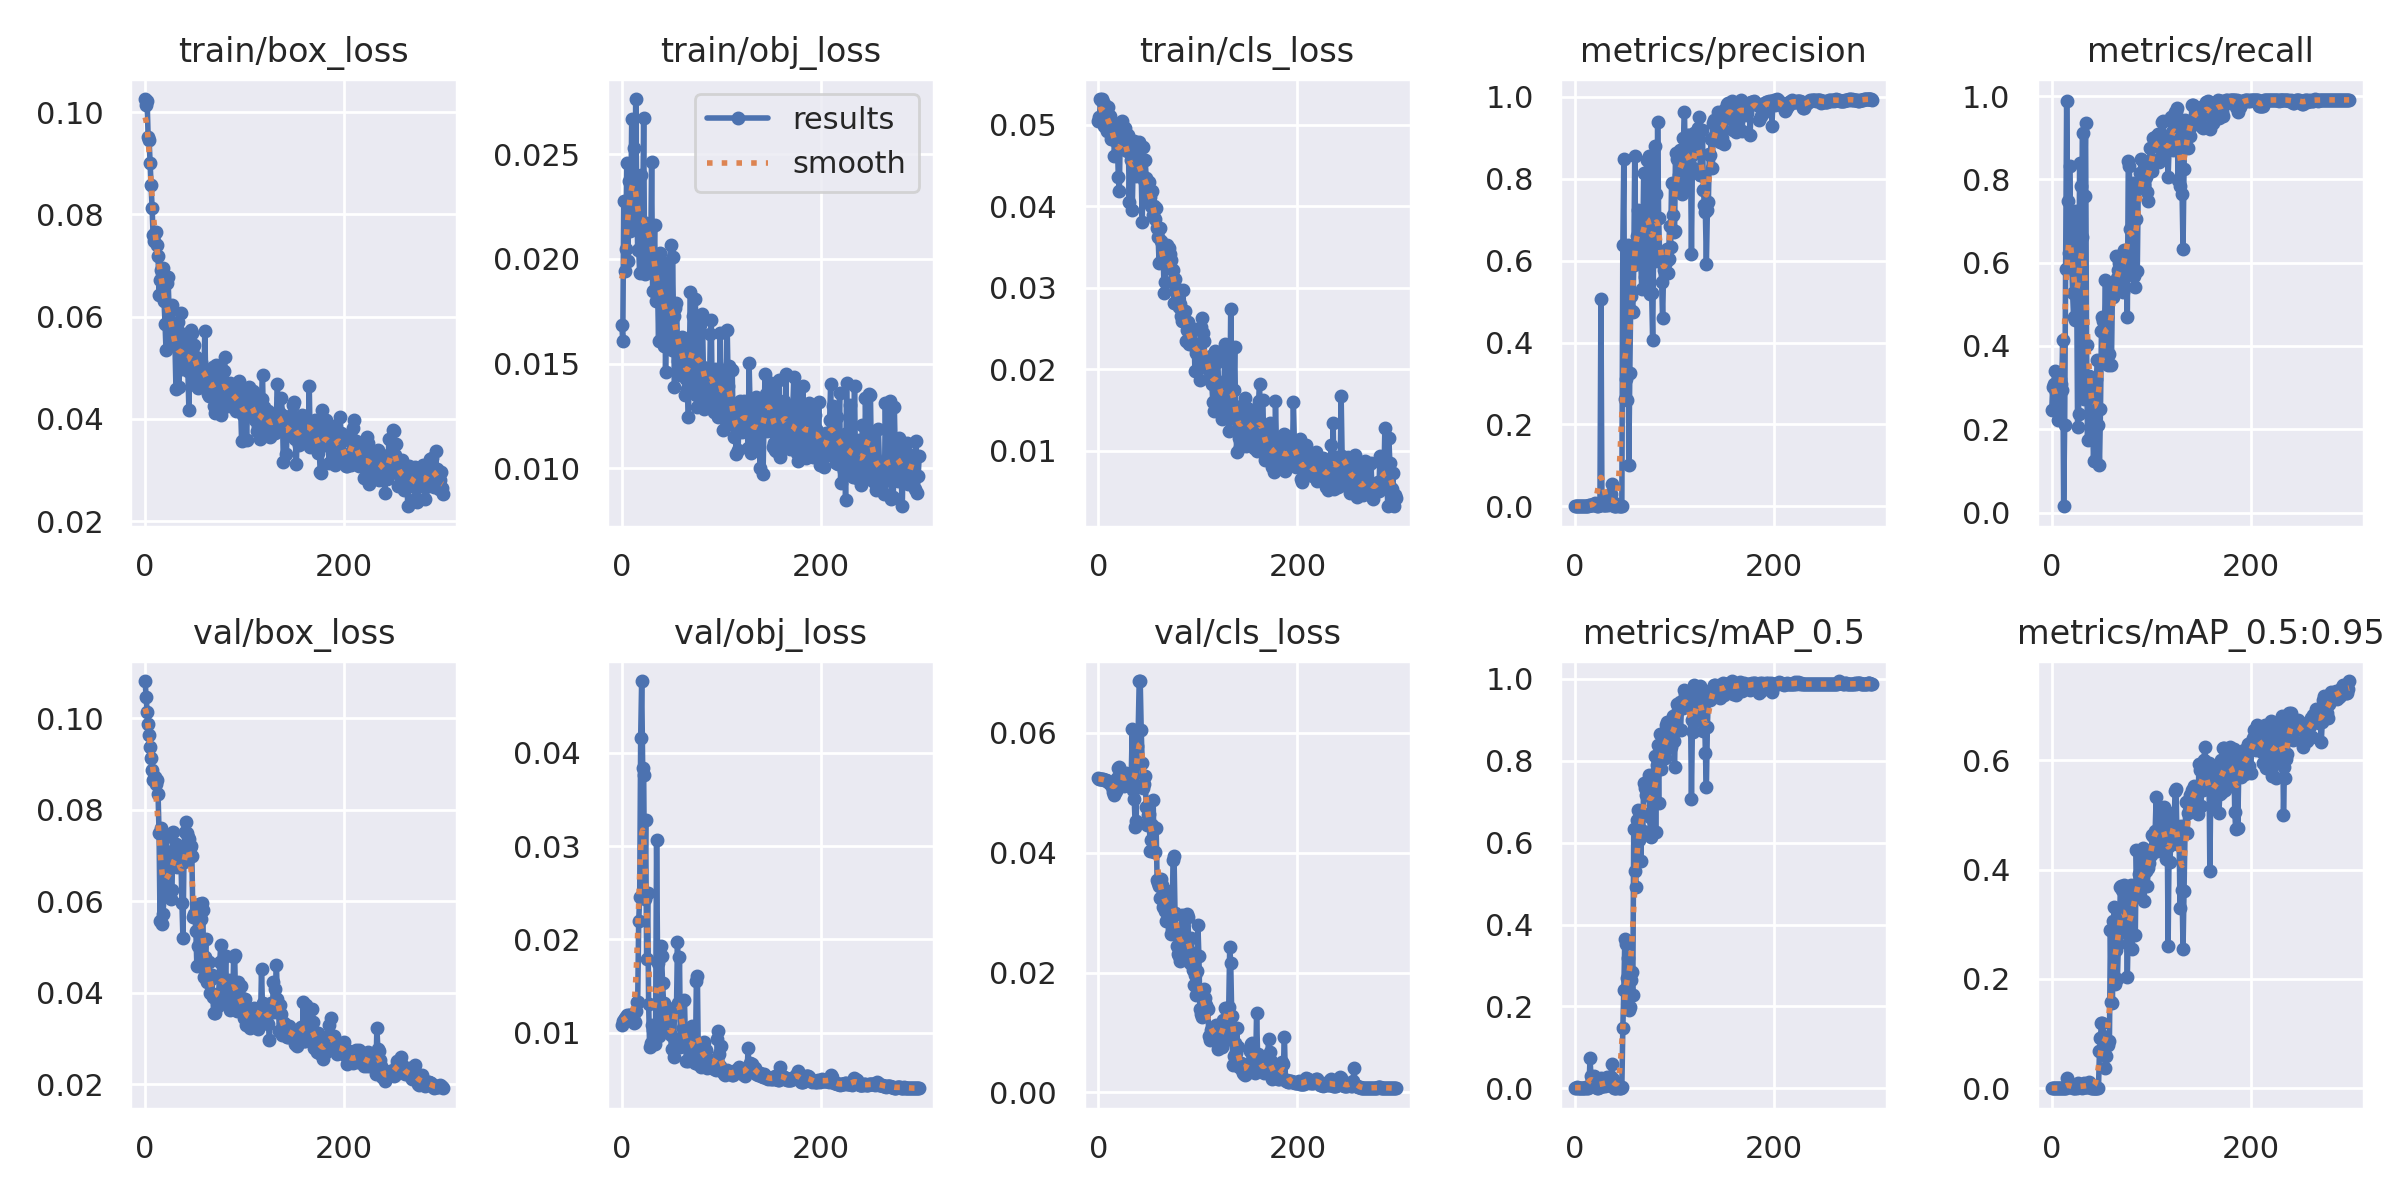

In [ ]:
from utils.plots import plot_results
Image(filename = "/content/yolov5/runs/train/yolov5s_results/results.png",width = 1000)

Ground Truth Training Data


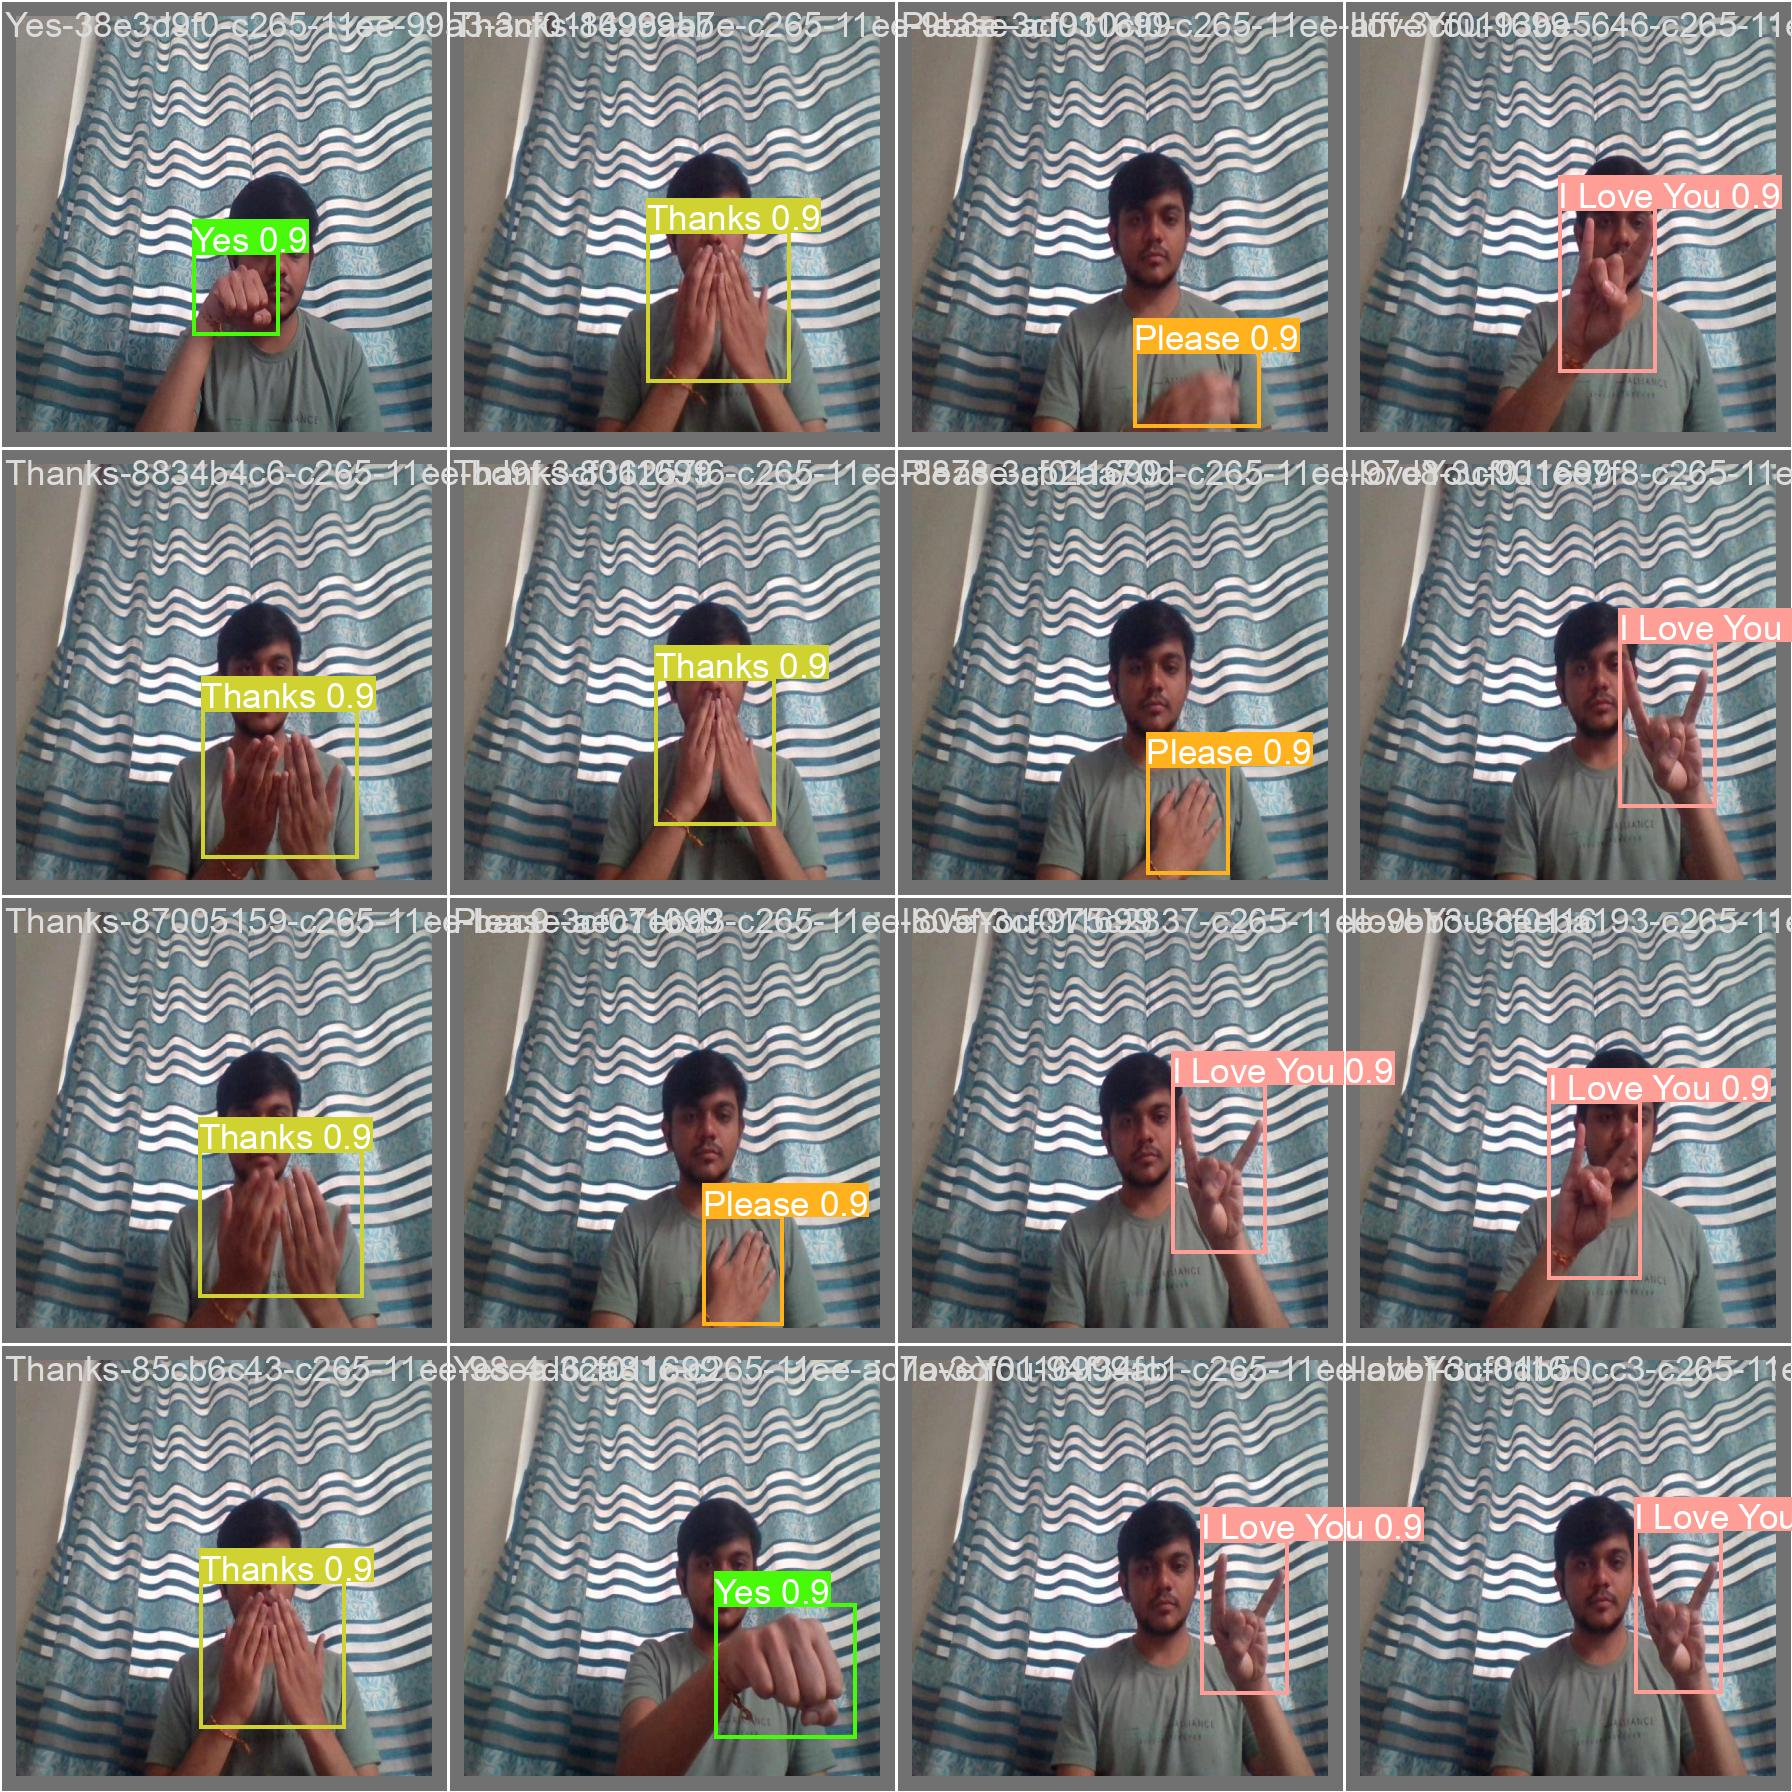

In [ ]:
print("Ground Truth Training Data")
Image(filename = "/content/yolov5/runs/train/yolov5s_results/val_batch1_pred.jpg",width = 900)